Copyright Matlantis Corp. as contributors to Matlantis contrib project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 6. Analyze the condition screening results
The condition screening results were confirmed.  
As a result the condition was choosed as follows:  
- Descriptors: pbev8 / r2scan
- Preprocess: MinMaxScaling + PCA with whiting
- model: lightGBM

In [2]:
with open("sample_output/05_res_data.txt", "r") as f:
    cnt = f.read().split("\n")

In [3]:
## temporary functions to extract info from log txt
def split_info(model_str):
    res = model_str.split("_")
    res[-2] = int(res[-2][1:])
    res[-1] = int(res[-1][1:])
    res[-1] = 256 if res[-1] < 0 else res[-1]
    return res

def extract_value(acc_str):
    return float(acc_str.split(":")[-1])

def summarize_info(cnt):
    x = cnt.split(" ")
    return split_info(x[0]) + [extract_value(x[1])] + [float(x[3][:-1])] + [extract_value(x[4])] + [float(x[6])]

info_list = [summarize_info(x) for x in cnt[:-1]]

In [4]:
df = pd.DataFrame(info_list, columns=["desc", "scaler", "white", "model", "data_size", "n_feature", "train_mae", "train_std", "val_mae", "val_std"])
df.head()
df["log_dsize"] = [np.log10(x) for x in df["data_size"]]

In [5]:
df.sort_values("val_mae")

,desc,scaler,white,model,data_size,n_feature,train_mae,train_std,val_mae,val_std,log_dsize
154,pbev8,MMN+PCA,white,lgb,1202908,256,0.079,0.005,0.124,0.002,6.080232
466,r2scan,MMN+PCA,white,lgb,1202914,256,0.081,0.004,0.125,0.002,6.080235
310,pbev8,STN+PCA,white,lgb,1202863,256,0.085,0.006,0.128,0.003,6.080216
620,r2scan,STN+PCA,white,lgb,1202829,128,0.088,0.004,0.131,0.002,6.080204
152,pbev8,MMN+PCA,white,lgb,1202908,128,0.094,0.010,0.132,0.005,6.080232
...,...,...,...,...,...,...,...,...,...,...,...
479,r2scan,STN+PCA,white,xgb,100,256,0.191,0.129,1.217,0.191,2.000000
164,pbev8,STN+PCA,white,lgb,100,128,0.241,0.152,1.243,0.299,2.000000
477,r2scan,STN+PCA,white,xgb,100,128,0.064,0.035,1.263,0.217,2.000000
478,r2scan,STN+PCA,white,lgb,100,256,0.427,0.069,1.293,0.290,2.000000


## Appendix
The effect of datasize and num_features were confirmed with lightGBM and XGBoost models.


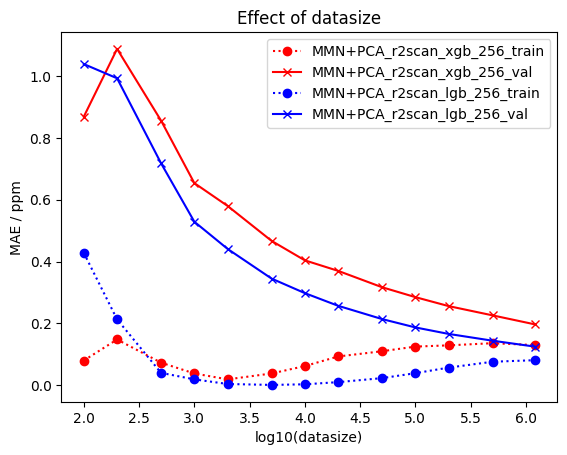

In [6]:
## data_size
cond_list = [
    ["MMN+PCA", "r2scan", "xgb", "256"],
    ["MMN+PCA", "r2scan", "lgb", "256"],
]

color_list = ["red", "blue"]

for idx, cond in enumerate(cond_list):
    df_tmp = df.query(f"scaler == '{cond[0]}' & desc == '{cond[1]}' & model == '{cond[2]}' & n_feature == {cond[3]}")
    plt.plot(df_tmp["log_dsize"], df_tmp["train_mae"], label="_".join(cond) + "_train", 
             color=color_list[idx], marker="o", linestyle=":")
    plt.plot(df_tmp["log_dsize"], df_tmp["val_mae"], label="_".join(cond) + "_val",
             color=color_list[idx], marker="x")
plt.xlabel("log10(datasize)")
plt.ylabel("MAE / ppm")
plt.title("Effect of datasize")
plt.legend()

In [7]:
df.query(f"scaler == '{cond[0]}' & desc == '{cond[1]}' & model == '{cond[2]}' ")

,desc,scaler,white,model,data_size,n_feature,train_mae,train_std,val_mae,val_std,log_dsize
312,r2scan,MMN+PCA,white,lgb,100,8,0.515,0.110,0.887,0.150,2.000000
314,r2scan,MMN+PCA,white,lgb,100,16,0.381,0.078,0.786,0.080,2.000000
316,r2scan,MMN+PCA,white,lgb,100,32,0.381,0.128,0.911,0.171,2.000000
318,r2scan,MMN+PCA,white,lgb,100,64,0.489,0.044,0.998,0.203,2.000000
320,r2scan,MMN+PCA,white,lgb,100,128,0.427,0.043,0.997,0.181,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
458,r2scan,MMN+PCA,white,lgb,1202914,16,0.182,0.004,0.216,0.002,6.080235
460,r2scan,MMN+PCA,white,lgb,1202914,32,0.123,0.003,0.165,0.001,6.080235
462,r2scan,MMN+PCA,white,lgb,1202914,64,0.111,0.013,0.147,0.007,6.080235
464,r2scan,MMN+PCA,white,lgb,1202914,128,0.092,0.006,0.132,0.003,6.080235


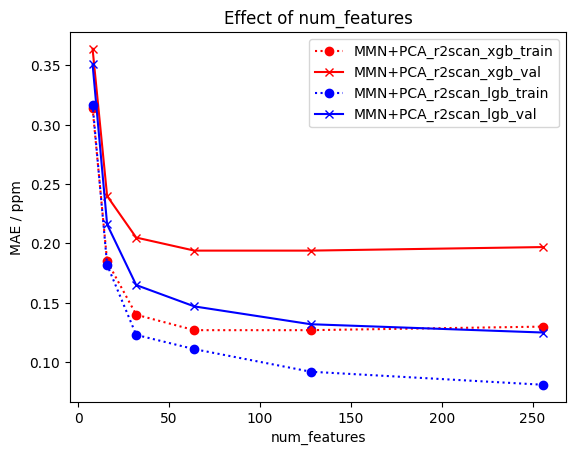

In [8]:
## n_feature
cond_list = [
    ["MMN+PCA", "r2scan", "xgb", "1202914"],
    ["MMN+PCA", "r2scan", "lgb", "1202914"],
]

color_list = ["red", "blue"]

for idx, cond in enumerate(cond_list):
    df_tmp = df.query(f"scaler == '{cond[0]}' & desc == '{cond[1]}' & model == '{cond[2]}' & data_size == {cond[3]}")
    plt.plot(df_tmp["n_feature"], df_tmp["train_mae"], label="_".join(cond[:3]) + "_train", 
             color=color_list[idx], marker="o", linestyle=":")
    plt.plot(df_tmp["n_feature"], df_tmp["val_mae"], label="_".join(cond[:3]) + "_val", 
             color=color_list[idx], marker="x")

plt.xlabel("num_features")
plt.ylabel("MAE / ppm")
plt.title("Effect of num_features")

plt.legend()